# EDA Group 10

## Submitted by: Raunak Sharma,Hunter Harmer,McKay Flake

### Table of Contents

1. [Introduction](#Introduction)
   - [Key Questions for Analysis](#Key-Questions-for-Analysis)
3. [Data Description and Initial Analysis](#Data-Description-and-Initial-Analysis)
   - [Description of the Data](#Description-of-the-Data)
5. [Handling Missing Data](#Handling-Missing-Data)
   - [Discussion of Missing Data](#Discussion-of-Missing-Data)
   - [Data preprocessing and Missing Values Handling](#Data-preprocessing-and-Missing-Values-Handling)
6. [Exploratory Visualizations and/or Summary Tables](#Exploratory-Visualizations-and-Summary-Tables)
7. [Interpretive Analysis](#Interpretive-Analysis)
8. [Results and Summary](#Results-and-Summary)
   -  [Results](#Results)
   -  [Summary](#Summary)
   -  [Conclusion](#Conclusion)
9. [Group member contribution](#Group-member-contribution)
   

##  Introduction <a id="Introduction"></a>

- **Objective**
The goal of this project is to provide a solution to Swire Coca-Cola that enables them to **minimize unplanned machine downtimes** and **improve productivity** across Swire Coca-Cola production plants by building a **predictive maintenance model**, thereby enabling the company to anticipate and prevent future failures. The **target variable** in this analysis is **ACTUAL_WORK_IN_MINUTES (downtime)**, which represents the duration of machine downtime. Once we gain a deeper understanding, we will develop a model that helps Swire Coca-Cola predict upcoming events and implement protocols to reduce unplanned machine downtimes. By reducing unplanned downtimes, the **project aims to lower financial losses and enhance operational efficiency across plants.**

- **Business and Analytic Problems**
From a business perspective, unplanned machine downtimes lead to substantial **operational disruptions and financial losses**. The primary challenge is identifying **predictors** that contribute to machine breakdowns, such as maintenance activity type (planned or unplanned), specific equipment IDs prone to failure, and functional locations with high downtime. The analytic problem involves analyzing these predictors to build a reliable predictive maintenance model that minimizes downtime (the target variable, ACTUAL_WORK_IN_MINUTES).

- **Purpose of the EDA Notebook**
The purpose of this notebook is to document the exploratory phase of the analytics process. In this initial analysis, we aim to better understand the relationships between variables, which will guide our model selection and address the objectives outlined in the business problem.

During this EDA, we will examine:
The structure of the data and visualize our findings. 
Explore some predictors such as equipment ID, maintenance type, and functional location to understand their impact on machine downtimes.
Assess the quality of the data, handling any missing or inconsistent entries, identify outliers to ensure reliable results for model-building.
Identify patterns and trends across predictors that may inform the development of a predictive model.
Gain insights into how planned vs. unplanned maintenance, specific equipment, and locations affect the target variable, ACTUAL_WORK_IN_MINUTES.


### Key Questions for Analysis <a id="Key-Questions-for-Analysis"></a>

1. **Examine the relationship between equipment ID and maintenance activity type to determine if certain components are more likely to fail unexpectedly.**  
   *This will help guide our further analysis as we focus on specific equipment IDs with a higher likelihood of unplanned failures.*

2. **Whether older machines are more likely to experience unplanned maintenance?**  
   *By analyzing the `EQUIP_START_UP_DATE` field, we can investigate if there is a correlation between a machine’s age and the frequency of unplanned maintenance events. Specifically, we aim to determine if older equipment tends to break down more often. If this is the case, implementing more frequent planned maintenance for older machines could reduce downtime and ultimately save the company money.*

3. **Whether certain plant IDs are more prone to unplanned maintenance activities?**  
   *By analyzing this, we may be able to identify problem plants and tailor our model to address the issues of a specific plant, rather than making it broad enough to handle problems across all plants.*

4. **What is the distribution of downtime (in minutes) across plants?**  
   *This analysis will help identify which plants experience the most downtime, highlighting areas that may require additional resources or targeted maintenance strategies.*

5. **Which equipment has the most frequent breakdowns?**  
   *By identifying equipment with high breakdown frequencies, we can focus on those assets that may need preventive maintenance or replacement, helping to reduce unplanned downtime.*

6. **Does the type of maintenance (planned/unplanned) affect downtime?**  
   *This question examines if unplanned maintenance leads to longer downtimes compared to planned maintenance. Understanding this relationship can guide scheduling strategies to minimize disruption.*

7. **Are there trends in downtime over time (monthly/seasonal)?**  
   *Analyzing downtime trends over months or seasons can reveal patterns that may align with operational schedules or external factors, allowing for more accurate planning and preventive measures.*
   
8. **Which functional locations experience the highest downtime?**  
   *Pinpointing locations with high downtime will allow us to focus on specific areas within a plant that contribute the most to operational delays, aiding in resource allocation and maintenance planning.*

9. **Which maintenance items are associated with the highest downtime?**  
   *By analyzing the downtime associated with specific maintenance items, we can prioritize those items for review, repair, or replacement to optimize operational efficiency.*


## Data Description and Initial Analysis <a id="Data-Description-and-Initial-Analysis"></a>

#### Installing Required Libraries

In [1]:
%%capture
!pip install pandas matplotlib seaborn

In [2]:
%%capture
!pip install skimpy

#### Importing the necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [4]:
# Load Data
df = pd.read_csv('IWC_Work_Orders_Extract.csv', low_memory=False)
df

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,...,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427259,702128637,G812,ROMA,2020-04-27,2020-04-27,06:00:00.000,06:00:00.000,15.0,G812200066,112883.0,...,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,LABELER,NaN,300017706.0,NaN,NaN,NaN,NaN,NaN
1427260,701327358,G812,ROMA,2019-05-01,2019-05-01,06:00:00.000,06:00:00.000,15.0,G812200066,112883.0,...,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,LABELER,NaN,300017706.0,NaN,NaN,NaN,NaN,NaN
1427261,702131299,G812,ROMA,2020-04-27,2020-04-27,06:00:00.000,06:00:00.000,18.0,G812200066,112883.0,...,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,LABELER,NaN,300017706.0,NaN,NaN,NaN,NaN,NaN
1427262,700640029,G812,ROMA,2018-06-04,2018-06-04,06:00:00.000,06:00:00.000,150.0,NaN,NaN,...,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,LABELER,NaN,300017706.0,NaN,NaN,NaN,NaN,NaN


#### Inspecting the dataset

In [6]:
# Overview of the dataset (basic info, data types, missing values, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

*The dataset consists of 1,427,264 entries and 25 columns, with a mix of data types (categorical, numerical, and datetime). Critical operational columns such as ORDER_ID, ACTUAL_WORK_IN_MINUTES, and MAINTENANCE_ACTIVITY_TYPE are complete, but several columns related to maintenance and equipment, like EQUIPMENT_DESC and MAINTENANCE_ITEM, have significant missing data. The majority of columns are object types, indicating categorical data or date fields that may need parsing for further analysis.*

In [5]:
# Display first few rows to understand structure of the dataset
df_head = df.head()
print(df_head)

    ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457     G812                ROMA           2024-05-04   
1  704191697     G812                ROMA           2022-09-13   
2  704466547     G812                ROMA           2022-12-21   
3  703834477     G812                ROMA           2022-07-04   
4  704661125     G291               MONZA           2023-03-15   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0            2024-05-12      06:00:00.000       23:04:08.000   
1            2022-09-13      06:00:00.000       17:17:24.000   
2            2022-12-21      07:00:00.000       07:00:00.000   
3            2022-07-04      06:00:00.000       06:00:00.000   
4            2023-03-15      07:00:00.000       07:00:00.000   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  ...  \
0                   390.0              NaN               NaN  ...   
1                   420.0              NaN               NaN  ...   
2          

In [6]:
#summary statistics
df.describe(include='all')

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
count,1.427264e+06,1427264,1427264,1427264,1427264,1427264,1427264,1.427264e+06,152594,152594.000000,...,282407,258691,237573,2180,2.917950e+05,79447,79447,79447,79447,79447
unique,NaN,6,6,2956,2956,65927,61388,NaN,3308,NaN,...,67,141,86,36,NaN,807,4,92,137,1
top,NaN,G261,SILVERSTONE,2019-04-16,2019-04-16,00:00:00.000,00:00:00.000,NaN,000000022943,NaN,...,CAN LINE,LINE #4-FILLER_ROTARY_CAN,FILLER,FULL CAN TO ACCUMULATION TABLE,NaN,L1 FILLER_ROTARY_CAN_72_VALVE,Machines,2017-02-15,2017-02-15,9999-12-31
freq,NaN,630903,630903,936,934,212155,202920,NaN,1327,NaN,...,34208,35834,46322,251,NaN,3745,79224,53650,32713,79447
mean,4.561470e+10,NaN,NaN,NaN,NaN,NaN,NaN,8.862968e+01,NaN,115846.807954,...,NaN,NaN,NaN,NaN,3.002609e+08,NaN,NaN,NaN,NaN,NaN
std,8.387114e+10,NaN,NaN,NaN,NaN,NaN,NaN,8.037915e+02,NaN,71325.255687,...,NaN,NaN,NaN,NaN,5.581645e+06,NaN,NaN,NaN,NaN,NaN
min,1.000219e+08,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,39801.000000,...,NaN,NaN,NaN,NaN,2.000871e+08,NaN,NaN,NaN,NaN,NaN
25%,4.022602e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+01,NaN,41046.000000,...,NaN,NaN,NaN,NaN,3.000092e+08,NaN,NaN,NaN,NaN,NaN
50%,7.044271e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.800000e+01,NaN,112995.000000,...,NaN,NaN,NaN,NaN,3.000178e+08,NaN,NaN,NaN,NaN,NaN
75%,1.002343e+09,NaN,NaN,NaN,NaN,NaN,NaN,9.000000e+01,NaN,134702.000000,...,NaN,NaN,NaN,NaN,3.000269e+08,NaN,NaN,NaN,NaN,NaN


### Description of the Data <a id="Description-of-the-Data"></a>

*The data provided for this project comes from Swire Coca-Cola's internal system, IWC, which tracks equipment breakdowns. The dataset contains maintenance records with key features such as plant ID, equipment ID, execution date, work duration, and type of maintenance. It is a large dataset with over 1.4 million records. The case description notes that the "actual working minutes" is the most reliable variable for determining the time spent on repairs, as the "actual start time" and "actual end time" can be inaccurate in certain situations.*

## Handling Missing Data <a id="Handling-Missing-Data"></a>

### Discussion of Missing Data <a id="Discussion-of-Missing-Data"></a>

### Understanding Missing Data

In [7]:
# Check for missing/duplicate values:

print("Missing values per column:")
print(df.isnull().sum())
print("\nNumber of duplicated rows:")
print(df.duplicated().sum())

Missing values per column:
ORDER_ID                                 0
PLANT_ID                                 0
PRODUCTION_LOCATION                      0
EXECUTION_START_DATE                     0
EXECUTION_FINISH_DATE                    0
ACTUAL_START_TIME                        0
ACTUAL_FINISH_TIME                       0
ACTUAL_WORK_IN_MINUTES                   0
MAINTENANCE_PLAN                   1274670
MAINTENANCE_ITEM                   1274670
MAINTENANCE_ACTIVITY_TYPE                0
ORDER_DESCRIPTION                  1135497
MAINTENANCE_TYPE_DESCRIPTION       1135469
FUNCTIONAL_LOC                     1135482
FUNCTIONAL_AREA_NODE_1_MODIFIED    1137147
FUNCTIONAL_AREA_NODE_2_MODIFIED    1144857
FUNCTIONAL_AREA_NODE_3_MODIFIED    1168573
FUNCTIONAL_AREA_NODE_4_MODIFIED    1189691
FUNCTIONAL_AREA_NODE_5_MODIFIED    1425084
EQUIPMENT_ID                       1135469
EQUIPMENT_DESC                     1347817
EQUIP_CAT_DESC                     1347817
EQUIP_START_UP_DATE        

In [8]:
df_filtered = df[df['PLANT_ID'] == 'G261']
df_filtered.head()

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
6042,901724580,G261,SILVERSTONE,2023-03-01,2023-03-01,12:52:00.000,12:52:00.000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6043,207731527,G261,SILVERSTONE,2022-12-14,2022-12-14,13:04:00.000,17:30:00.000,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6045,200003228916,G261,SILVERSTONE,2022-08-05,2022-08-05,19:06:00.000,21:40:00.000,153.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6046,200000808319,G261,SILVERSTONE,2018-05-16,2018-05-16,18:11:00.000,19:01:00.000,50.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6053,401519840,G261,SILVERSTONE,2021-07-23,2021-07-23,13:01:00.000,16:50:00.000,422.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*For PLANT_ID G261, there are several missing values across columns like MAINTENANCE_PLAN, MAINTENANCE_ITEM, and FUNCTIONAL_AREA_NODE, suggesting data gaps specific to this plant. The ACTUAL_WORK_IN_MINUTES variable varies, with some entries showing zero downtime, where ACTUAL_START_TIME equals ACTUAL_FINISH_TIME. These records may indicate maintenance logged without operational impact or possible data entry issues. Further investigation is needed to handle these gaps and ensure data quality for analysis.*

*The dataset contains significant missing data in several columns, particularly in MAINTENANCE_PLAN, MAINTENANCE_ITEM, ORDER_DESCRIPTION, and various FUNCTIONAL_AREA_NODE_* columns, with some having over 70% of their values missing. These columns may not be critical for the analysis and could be candidates for removal. In some cases though, the missing data is meaningful. For example, if MAINTENANCE_PLAN or EQUIP_VALID_FROM is missing, that might indicate that the equipment wasn’t in use or no maintenance plan was required. In these cases, leaving the missing data as NaN might be acceptable and even informative.However, for columns that are important, like ORDER_DESCRIPTION, filling missing values with placeholders such as "Unknown" or using statistical imputation methods like the mode or median may be more appropriate.*

*Additionally, since there are no duplicated rows, the data is clean in that respect. Moving forward, it’s essential that we decide as a team which columns to retain based on their relevance and to document any imputation or data-dropping decisions. This will ensure that the dataset is prepared for modeling while maintaining transparency in handling missing data.*

### Data preprocessing and Missing Values Handling <a id="Data-preprocessing-and-Missing-Values-Handling"></a>

In [38]:
# Create a copy of the data for cleaning and processing
df_copy = df.copy()

In [41]:
# list of essential columns based on project needs
essential_columns = [
    'ORDER_DESCRIPTION', 'ACTUAL_WORK_IN_MINUTES', 'EQUIP_VALID_FROM', 
    'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 'FUNCTIONAL_AREA_NODE_1_MODIFIED', 
    'FUNCTIONAL_AREA_NODE_2_MODIFIED', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 
    'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'FUNCTIONAL_LOC',
    'EQUIPMENT_ID', 'EQUIP_CAT_DESC', 'EXECUTION_START_DATE', 'EXECUTION_FINISH_DATE'
]

# Step 1: Drop columns with over 70% missing values, but retain all essential columns
threshold = 0.7 * len(df_copy)
columns_to_drop = [col for col in df_copy.columns if df_copy[col].isnull().sum() > threshold and col not in essential_columns]
df_copy.drop(columns=columns_to_drop, inplace=True)


In [42]:
# Check the remaining columns and their missing data count after conditional dropping
remaining_columns = df_copy.columns
missing_data_after_conditional_drop = df_copy.isnull().sum()

remaining_columns, missing_data_after_conditional_drop

(Index(['ORDER_ID', 'PLANT_ID', 'PRODUCTION_LOCATION', 'EXECUTION_START_DATE',
        'EXECUTION_FINISH_DATE', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME',
        'ACTUAL_WORK_IN_MINUTES', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM',
        'MAINTENANCE_ACTIVITY_TYPE', 'ORDER_DESCRIPTION', 'FUNCTIONAL_LOC',
        'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
        'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
        'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_ID', 'EQUIP_CAT_DESC',
        'EQUIP_VALID_FROM'],
       dtype='object'),
 ORDER_ID                                 0
 PLANT_ID                                 0
 PRODUCTION_LOCATION                      0
 EXECUTION_START_DATE                     0
 EXECUTION_FINISH_DATE                    0
 ACTUAL_START_TIME                        0
 ACTUAL_FINISH_TIME                       0
 ACTUAL_WORK_IN_MINUTES                   0
 MAINTENANCE_PLAN                   1274670
 MAINTENANCE_

In [43]:
# Step 2: Impute missing values for essential columns that are retained

# Essential Categorical Columns
categorical_cols = ['ORDER_DESCRIPTION', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 'FUNCTIONAL_LOC',
                    'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
                    'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 
                    'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIP_CAT_DESC']

for col in categorical_cols:
    if col in df_copy.columns:
        # Explicitly cast to string to ensure compatibility, then fill with 'Unknown'
        df_copy[col] = df_copy[col].astype(str).fillna('Unknown')

# Essential Numerical Columns
numerical_cols = ['ACTUAL_WORK_IN_MINUTES', 'EQUIPMENT_ID']

for col in numerical_cols:
    if col in df_copy.columns:
        # Fill missing values with the median
        df_copy[col] = df_copy[col].fillna(df_copy[col].median())

# Step 3: Preserve meaningful NaNs for Date Columns like EQUIP_VALID_FROM
date_cols = ['EXECUTION_START_DATE', 'EXECUTION_FINISH_DATE', 'EQUIP_VALID_FROM']

for col in date_cols:
    if col in df_copy.columns:
        # Convert to datetime format without inplace, preserving NaNs where necessary
        df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')


In [44]:
# Final dataset check to ensure modifications were successful
df_copy_info = df_copy.info()
missing_data_summary_final = df_copy.isnull().sum()

df_copy_info, missing_data_summary_final


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   ORDER_ID                         1427264 non-null  int64         
 1   PLANT_ID                         1427264 non-null  object        
 2   PRODUCTION_LOCATION              1427264 non-null  object        
 3   EXECUTION_START_DATE             1427264 non-null  datetime64[ns]
 4   EXECUTION_FINISH_DATE            1427264 non-null  datetime64[ns]
 5   ACTUAL_START_TIME                1427264 non-null  object        
 6   ACTUAL_FINISH_TIME               1427264 non-null  object        
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64       
 8   MAINTENANCE_PLAN                 1427264 non-null  object        
 9   MAINTENANCE_ITEM                 1427264 non-null  object        
 10  MAINTENANCE_ACTIVITY_TYPE     

(None,
 ORDER_ID                                 0
 PLANT_ID                                 0
 PRODUCTION_LOCATION                      0
 EXECUTION_START_DATE                     0
 EXECUTION_FINISH_DATE                    0
 ACTUAL_START_TIME                        0
 ACTUAL_FINISH_TIME                       0
 ACTUAL_WORK_IN_MINUTES                   0
 MAINTENANCE_PLAN                         0
 MAINTENANCE_ITEM                         0
 MAINTENANCE_ACTIVITY_TYPE                0
 ORDER_DESCRIPTION                        0
 FUNCTIONAL_LOC                           0
 FUNCTIONAL_AREA_NODE_1_MODIFIED          0
 FUNCTIONAL_AREA_NODE_2_MODIFIED          0
 FUNCTIONAL_AREA_NODE_3_MODIFIED          0
 FUNCTIONAL_AREA_NODE_4_MODIFIED          0
 FUNCTIONAL_AREA_NODE_5_MODIFIED          0
 EQUIPMENT_ID                             0
 EQUIP_CAT_DESC                           0
 EQUIP_VALID_FROM                   1347817
 dtype: int64)

*In the above step, we ensured that essential columns were retained and missing values were addressed appropriately. For categorical columns like ORDER_DESCRIPTION, MAINTENANCE_PLAN, and EQUIP_CAT_DESC, missing values were filled with 'Unknown' to maintain completeness and allow for categorical analysis. Numerical columns, such as ACTUAL_WORK_IN_MINUTES and EQUIPMENT_ID, had missing values imputed with the median to preserve central tendencies without skewing data due to outliers. Date columns, including EXECUTION_START_DATE, EXECUTION_FINISH_DATE, and EQUIP_VALID_FROM, were converted to datetime format without filling in NaN values. This preserves potential insights about equipment age or operational gaps, particularly for EQUIP_VALID_FROM, which still has substantial missing data. This balanced approach ensures that the dataset is ready for further analysis, with key features intact and meaningful NaNs preserved.*

## Exploratory Visualizations and/or Summary Tables <a id="Exploratory-Visualizations-and-Summary-Tables"></a>

## Question 1
### Examine the relationship between equipment ID and maintenance activity type. 

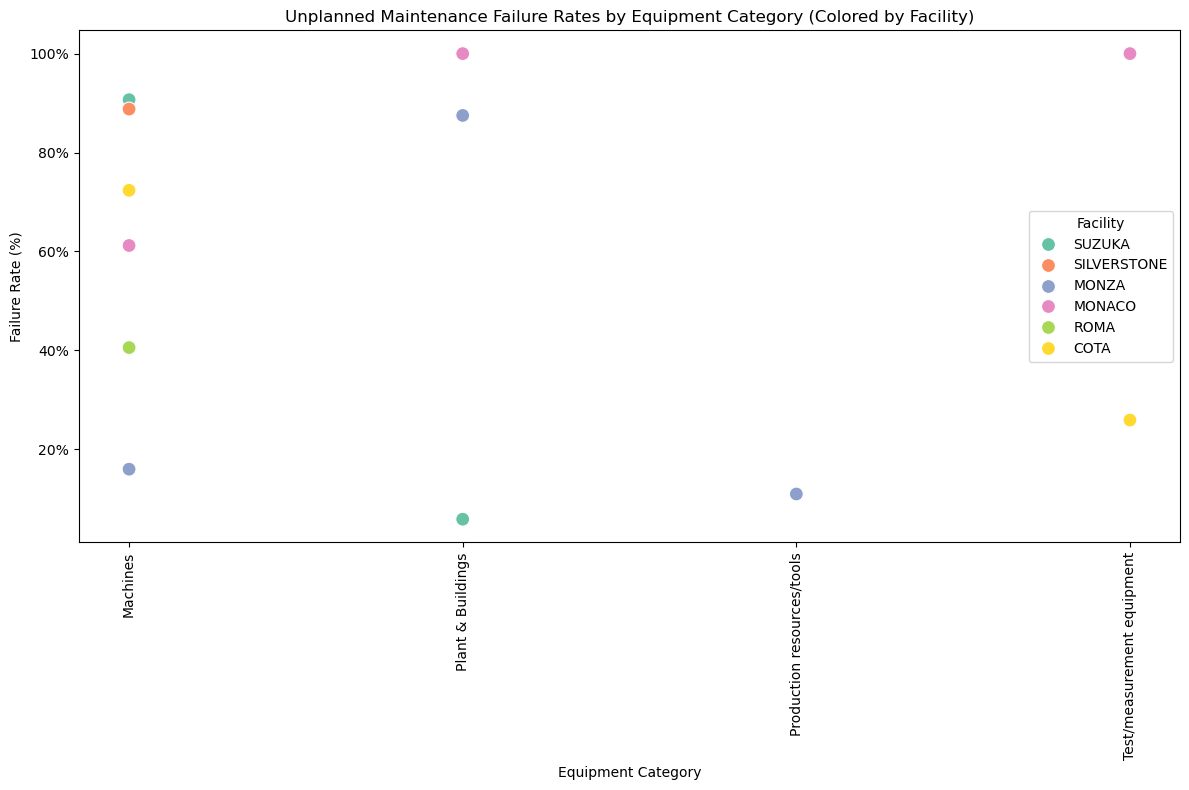

In [22]:
# Count unique values in Maintenance Activities using df_copy1
maintenance_activity_counts = df_copy1['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Filter for unplanned maintenance
unplanned_df_copy1 = df_copy1[df_copy1['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned']

# Group by EQUIP_CAT_DESC, PLANT_ID, and PRODUCTION_LOCATION to retain facility and plant info
equipment_failures = unplanned_df_copy1.groupby(['EQUIP_CAT_DESC', 'PLANT_ID', 'PRODUCTION_LOCATION']).size().reset_index(name='Unplanned_Failures')

# Total maintenance activities by equipment category, plant, and facility
total_maintenance = df_copy1.groupby(['EQUIP_CAT_DESC', 'PLANT_ID', 'PRODUCTION_LOCATION']).size().reset_index(name='Total_Maintenance')

# Merge the two DataFrames to calculate failure rates
failure_rates = pd.merge(equipment_failures, total_maintenance, on=['EQUIP_CAT_DESC', 'PLANT_ID', 'PRODUCTION_LOCATION'])

# Calculate the failure rate
failure_rates['Failure_Rate'] = failure_rates['Unplanned_Failures'] / failure_rates['Total_Maintenance']

# Ensure equipment category descriptions are strings for proper labeling
failure_rates['EQUIP_CAT_DESC'] = failure_rates['EQUIP_CAT_DESC'].astype(str)

# Plot the failure rate by equipment category, colored by facility
plt.figure(figsize=(12,8))
sns.scatterplot(data=failure_rates, x='EQUIP_CAT_DESC', y='Failure_Rate', hue='PRODUCTION_LOCATION', palette='Set2', s=100)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Set titles and labels
plt.title('Unplanned Maintenance Failure Rates by Equipment Category (Colored by Facility)')
plt.xlabel('Equipment Category')
plt.ylabel('Failure Rate (%)')

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Add legend for facilities and adjust layout
plt.legend(title="Facility")
plt.tight_layout()

# Show the plot
plt.show()


*Silverstone experiences a high failure rate, with approximately 90% of maintenance events being unplanned, especially within the machine equipment category. This makes it an ideal focus area for developing a predictive model tailored to this specific subset.*

## Question 2
### Explore is whether older machines are more likely to experience unplanned maintenance

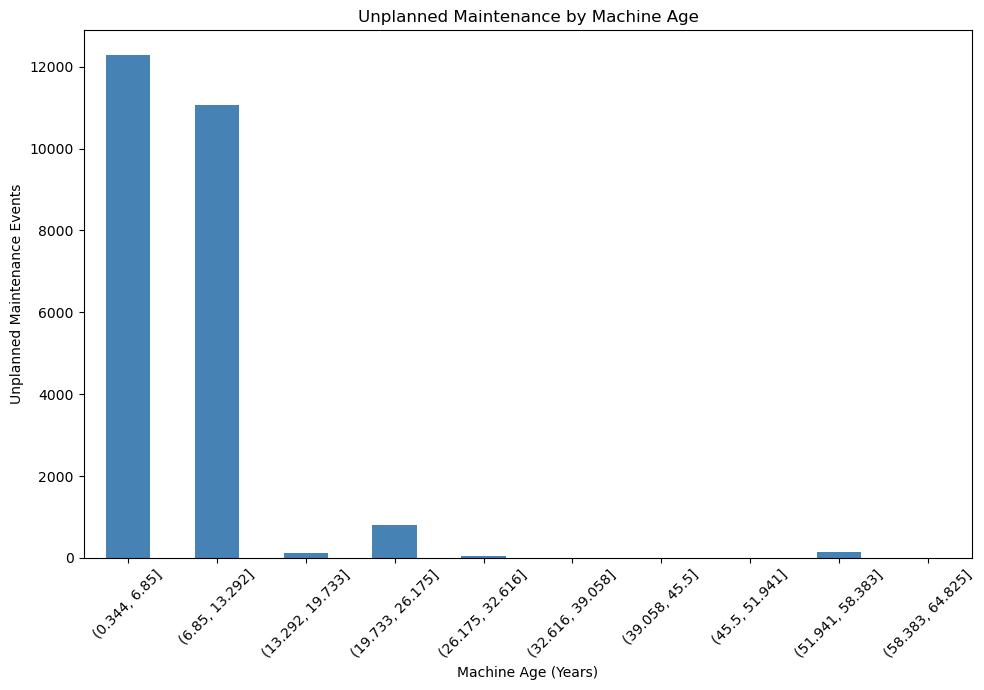

In [76]:

# Create a copy for this specific analysis
df_copy1 = df.copy()

# Convert EQUIP_START_UP_DATE to datetime and calculate machine age in years
df_copy1['EQUIP_START_UP_DATE'] = pd.to_datetime(df_copy1['EQUIP_START_UP_DATE'], errors='coerce')
df_copy1['MACHINE_AGE_YEARS'] = (pd.Timestamp.now() - df_copy1['EQUIP_START_UP_DATE']).dt.days / 365

# Filter for unplanned maintenance events and group by machine age bins
unplanned = df_copy1[df_copy1['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned']
age_bins = pd.cut(unplanned['MACHINE_AGE_YEARS'], bins=10)
unplanned_by_age = unplanned.groupby(age_bins, observed=False).size()  # Set observed=False

# Plot the data
plt.figure(figsize=(10, 7))
unplanned_by_age.plot(kind='bar', color='steelblue')
plt.title('Unplanned Maintenance by Machine Age')
plt.xlabel('Machine Age (Years)')
plt.ylabel('Unplanned Maintenance Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
# Redefine the unplanned maintenance events summary table for machine age bins
unplanned_by_age_summary = unplanned_by_age.reset_index(name='Unplanned_Maintenance_Events')

# Display the summary table
print("Unplanned Maintenance Events by Machine Age Summary:")
print(unplanned_by_age_summary)


Unplanned Maintenance Events by Machine Age Summary:
  MACHINE_AGE_YEARS  Unplanned_Maintenance_Events
0     (0.344, 6.85]                         12275
1    (6.85, 13.292]                         11064
2  (13.292, 19.733]                           129
3  (19.733, 26.175]                           804
4  (26.175, 32.616]                            54
5  (32.616, 39.058]                             0
6    (39.058, 45.5]                             0
7    (45.5, 51.941]                             0
8  (51.941, 58.383]                           145
9  (58.383, 64.825]                             1


*The above bar chart and summary table shows that younger machines (0.3 to 6 years old) experience more unplanned maintenance than older ones. This suggests that predictive maintenance efforts might be more effective if focused on older machines with established maintenance protocols.*

## Question 3
### explore whether certain plant IDs are more prone to unplanned maintenance activities

<Figure size 1000x700 with 0 Axes>

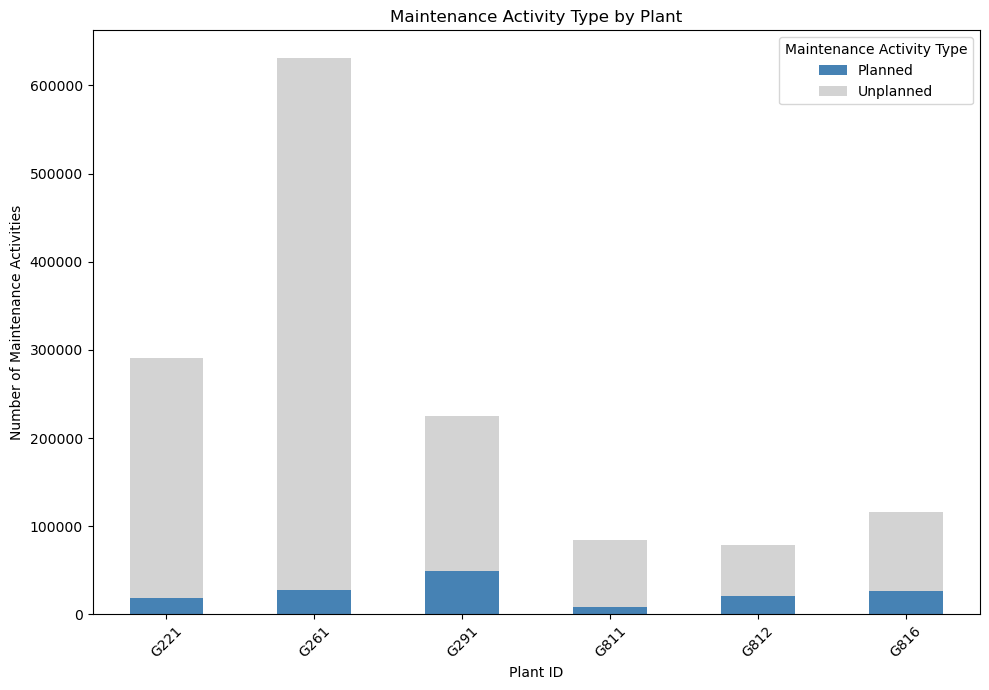

In [21]:
# Drop rows with missing values in relevant columns, if any, in the df_copy1
df_copy1 = df_copy1.dropna(subset=['MAINTENANCE_ACTIVITY_TYPE', 'PLANT_ID'])

# Group by PLANT_ID and MAINTENANCE_ACTIVITY_TYPE and count occurrences
maintenance_count = df_copy1.groupby(['PLANT_ID', 'MAINTENANCE_ACTIVITY_TYPE']).size().unstack()

# Plot the grouped data
plt.figure(figsize=(10, 7))
maintenance_count.plot(kind='bar', stacked=True, color=['steelblue', 'lightgray'], figsize=(10, 7))

# Labeling the axes and chart
plt.title('Maintenance Activity Type by Plant')
plt.xlabel('Plant ID')
plt.ylabel('Number of Maintenance Activities')
plt.xticks(rotation=45)
plt.legend(title='Maintenance Activity Type')
plt.tight_layout()

# Show the plot
plt.show()



*The above bar chart shows that the Plant G261 (Silver Stone) stands out with the highest number of unplanned maintenance activities and a significant imbalance between planned and unplanned maintenance. Focusing the predictive model on Silver Stone could improve accuracy by addressing its specific maintenance issues.

## Question 4. 
### What is the distribution of downtime (in minutes) across plants?

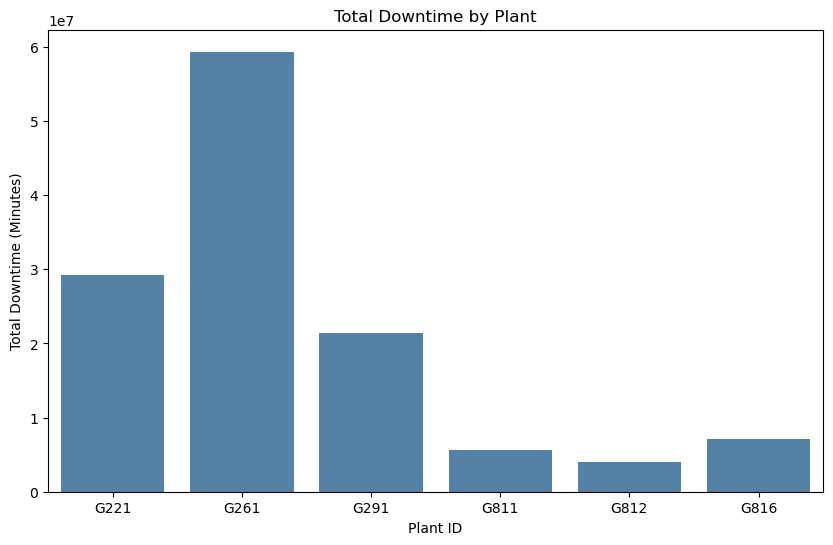

In [45]:
# 1. Distribution of Downtime(in minutes) by Plant
downtime_by_plant = df_copy.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='PLANT_ID', y='ACTUAL_WORK_IN_MINUTES', data=downtime_by_plant, color='steelblue')
plt.title('Total Downtime by Plant')
plt.xlabel('Plant ID')
plt.ylabel('Total Downtime (Minutes)')
plt.show()

In [74]:
# Display the summary table for total downtime by plant
print("Total Downtime by Plant Summary:")
print(downtime_by_plant)

Total Downtime by Plant Summary:
  PLANT_ID  ACTUAL_WORK_IN_MINUTES
0     G221              29192953.7
1     G261              59359710.1
2     G291              21348696.8
3     G811               5567999.4
4     G812               3966577.8
5     G816               7062019.2


*The chart and the summary table shows that Plant G261 has the highest downtime by a significant margin, with over 60 million minutes of downtime, making it a critical area for investigation. Plants G221 and G291 also have notable downtimes, though much lower than G261. In contrast, Plants G811, G812, and G816 show relatively minimal downtime, suggesting better efficiency. Focusing on reducing downtime in G261 and applying best practices from the more efficient plants could greatly improve overall operations*

## Question 5. 
### Which equipment has the most frequent breakdowns?

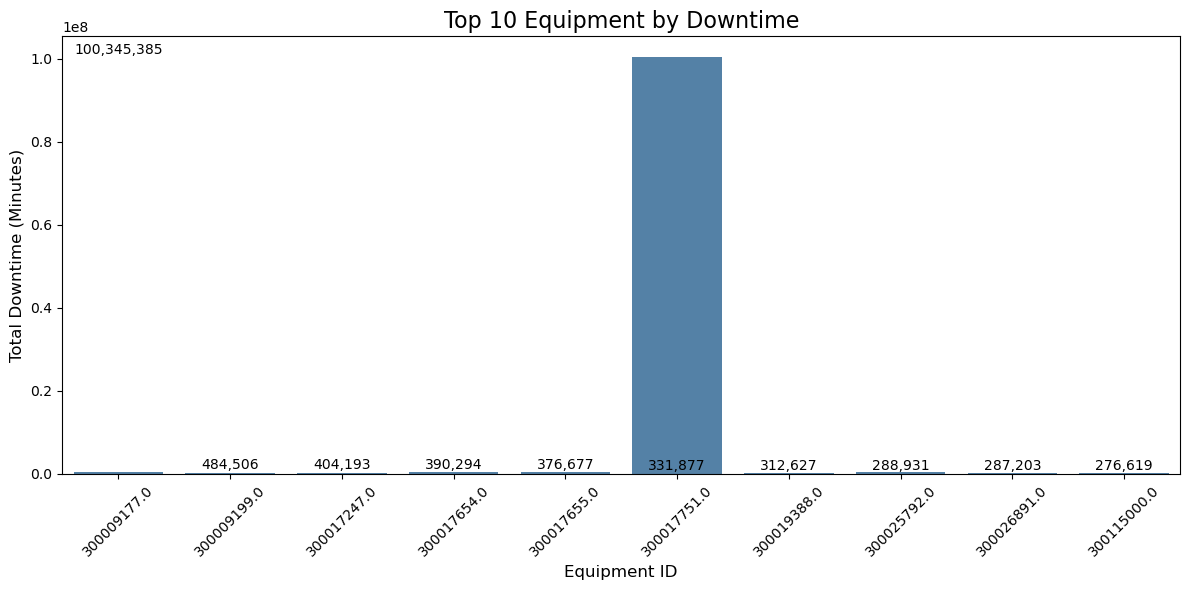

In [73]:
# Top 10 Equipment by Downtime
downtime_by_equipment = df_copy.groupby('EQUIPMENT_ID')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()
downtime_by_equipment_sorted = downtime_by_equipment.sort_values('ACTUAL_WORK_IN_MINUTES', ascending=False)

# Plot the Top 10 Equipment by Downtime with steelblue color
plt.figure(figsize=(12,6))  # Increased figure size for better readability
sns.barplot(x='EQUIPMENT_ID', y='ACTUAL_WORK_IN_MINUTES', data=downtime_by_equipment_sorted.head(10), color='steelblue')

# Add exact values on top of the bars
for index, value in enumerate(downtime_by_equipment_sorted['ACTUAL_WORK_IN_MINUTES'].head(10)):
    plt.text(index, value, f'{int(value):,}', ha='center', va='bottom')

# Customize the plot for readability
plt.title('Top 10 Equipment by Downtime', fontsize=16)
plt.xlabel('Equipment ID', fontsize=12)
plt.ylabel('Total Downtime (Minutes)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better visibility

# Show the plot with tight layout to avoid overlap
plt.tight_layout()

plt.show()


*The bar chart highlights the top 10 equipment IDs ranked by total downtime in minutes. Equipment ID 300017751.0 exhibits an exceptionally high downtime of over 100 million minutes, vastly surpassing the others. The next highest, Equipment ID 300009199.0, has around 484,506 minutes of downtime, underscoring a major gap between the two. The remaining equipment, such as 300017247.0 with 404,193 minutes and 300017654.0 with 390,294 minutes, show relatively similar downtimes, ranging between 276,619 and 404,193 minutes. This significant disparity indicates that Equipment ID 300017751.0 may need urgent maintenance focus, as it disproportionately contributes to the overall downtime.*

## Question 6. 
### Does the type of maintenance (planned/unplanned) affect downtime?

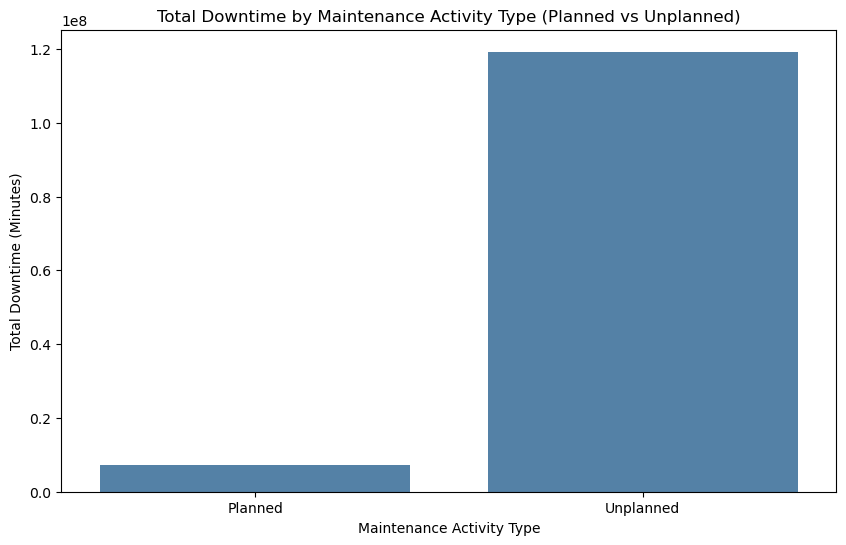

In [47]:
# 3. Downtime by Maintenance Activity Type (Planned vs Unplanned)
downtime_by_activity_type = df_copy.groupby('MAINTENANCE_ACTIVITY_TYPE')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='MAINTENANCE_ACTIVITY_TYPE', y='ACTUAL_WORK_IN_MINUTES', data=downtime_by_activity_type, color='steelblue')
plt.title('Total Downtime by Maintenance Activity Type (Planned vs Unplanned)')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Total Downtime (Minutes)')
plt.show()

*The bar chart shows that unplanned maintenance leads to significantly more downtime compared to planned maintenance. Unplanned maintenance contributes over 120 million minutes, while planned maintenance results in far less downtime, approximately 10 million minutes. This suggests that implementing more preventive (planned) maintenance could drastically reduce overall downtime. The disparity highlights the critical impact of unplanned maintenance on operational efficiency*

## Question 7. 
### Are there trends in downtime over time (monthly/seasonal)?

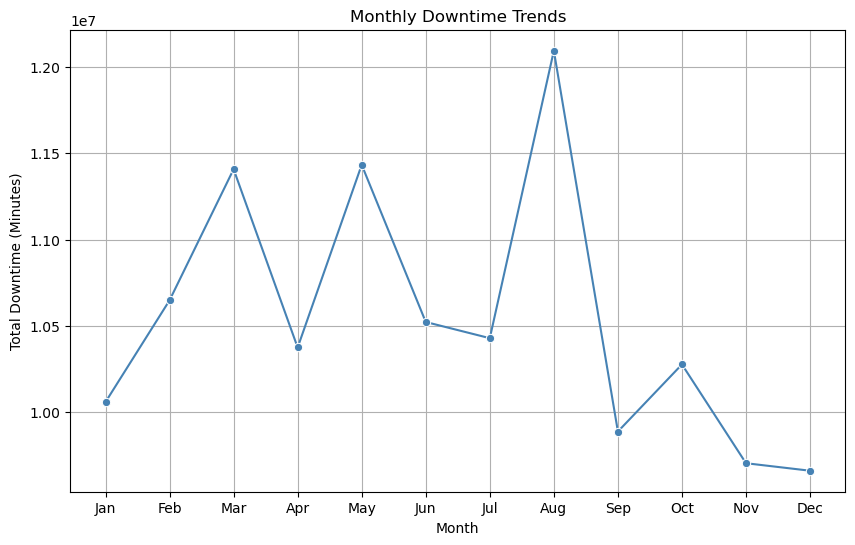

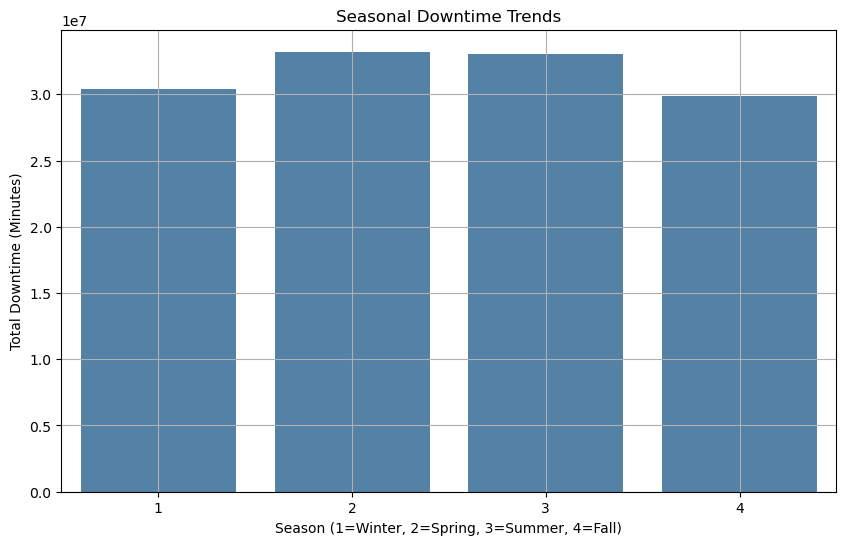

In [48]:
# Create a new copy for this analysis
dfcopy1 = df_copy.copy()

# Convert EXECUTION_FINISH_DATE to datetime format
dfcopy1['EXECUTION_FINISH_DATE'] = pd.to_datetime(dfcopy1['EXECUTION_FINISH_DATE'], errors='coerce')

# Extract Month and Season from EXECUTION_FINISH_DATE
dfcopy1['Month'] = dfcopy1['EXECUTION_FINISH_DATE'].dt.month  # Extracting the month
dfcopy1['Season'] = dfcopy1['EXECUTION_FINISH_DATE'].dt.month % 12 // 3 + 1  # 1=Winter, 2=Spring, 3=Summer, 4=Fall

# Group by Month and Season to calculate total downtime
monthly_downtime = dfcopy1.groupby('Month')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()
seasonal_downtime = dfcopy1.groupby('Season')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()

# Plot Monthly Downtime Trends
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='ACTUAL_WORK_IN_MINUTES', data=monthly_downtime, marker='o', color='steelblue')
plt.title('Monthly Downtime Trends')
plt.xlabel('Month')
plt.ylabel('Total Downtime (Minutes)')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Plot Seasonal Downtime Trends (without palette to avoid FutureWarning)
plt.figure(figsize=(10,6))
sns.barplot(x='Season', y='ACTUAL_WORK_IN_MINUTES', data=seasonal_downtime, color='steelblue')
plt.title('Seasonal Downtime Trends')
plt.xlabel('Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)')
plt.ylabel('Total Downtime (Minutes)')
plt.grid(True)
plt.show()


In [71]:
# Display the monthly downtime summary table
print("Monthly Downtime Summary:")
print(monthly_downtime)

# Display the seasonal downtime summary table
print("\nSeasonal Downtime Summary:")
print(seasonal_downtime)


Monthly Downtime Summary:
    Month  ACTUAL_WORK_IN_MINUTES
0       1              10058859.0
1       2              10648139.2
2       3              11407701.8
3       4              10374800.0
4       5              11432976.4
5       6              10522536.4
6       7              10428784.7
7       8              12094094.5
8       9               9887939.1
9      10              10276794.3
10     11               9704383.2
11     12               9660948.4

Seasonal Downtime Summary:
   Season  ACTUAL_WORK_IN_MINUTES
0       1              30367946.6
1       2              33215478.2
2       3              33045415.6
3       4              29869116.6


*Monthly Downtime Trends: The first chart shows fluctuations in downtime across the months, with peaks in March, May, and a significant peak in August. Downtime drops sharply in September, followed by smaller upticks in October and November.*

*Seasonal Downtime Trends: The second chart indicates relatively consistent downtime across the seasons, with Winter and Fall showing slightly lower downtime compared to Spring and Summer.*

*Overall, there are noticeable variations in downtime by month, but the seasonal downtime remains fairly balanced, with slightly higher downtime during the warmer seasons (Spring and Summer).*

## Question 8. 
### Which functional locations experience the highest downtime?

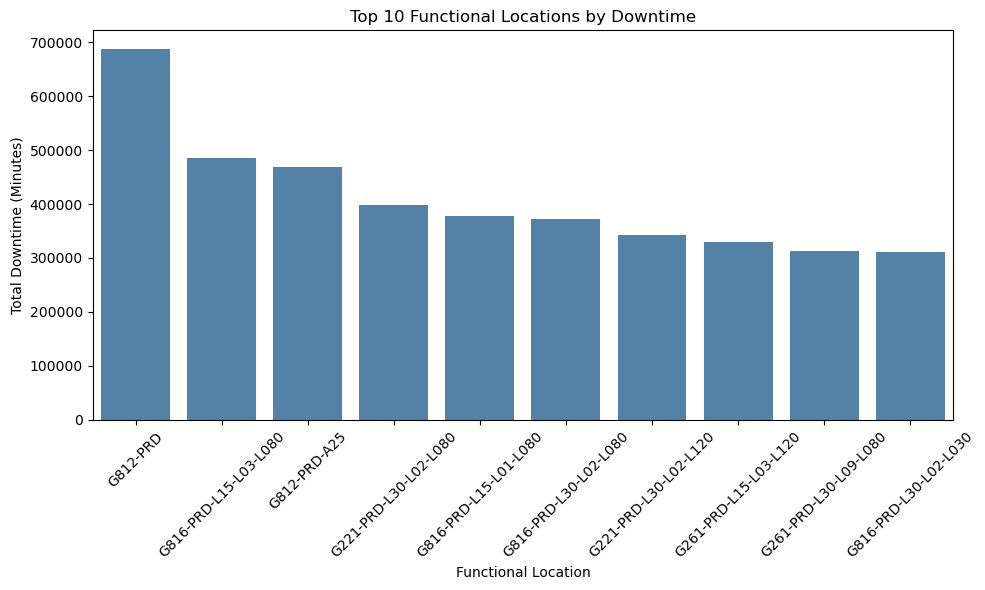

In [52]:
# Top 10 Functional Locations by Downtime using steelblue color palette
downtime_by_functional_loc = df.groupby('FUNCTIONAL_LOC')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()
downtime_by_functional_loc_sorted = downtime_by_functional_loc.sort_values('ACTUAL_WORK_IN_MINUTES', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='FUNCTIONAL_LOC', y='ACTUAL_WORK_IN_MINUTES', data=downtime_by_functional_loc_sorted.head(10), color='steelblue')
plt.title('Top 10 Functional Locations by Downtime')
plt.xlabel('Functional Location')
plt.ylabel('Total Downtime (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart shows the Top 10 Functional Locations by downtime, with G812-PRD having the highest total downtime, exceeding 700,000 minutes. Several other locations, such as G816-PRD-L15-103-1080 and G812-PRD-A25, also have significant downtimes, but none come close to G812-PRD. The distribution indicates that specific locations have much higher downtime, which may warrant further investigation into their maintenance processes or equipment issues.

## Question 9. 
### Which maintenance items are associated with the highest downtime?

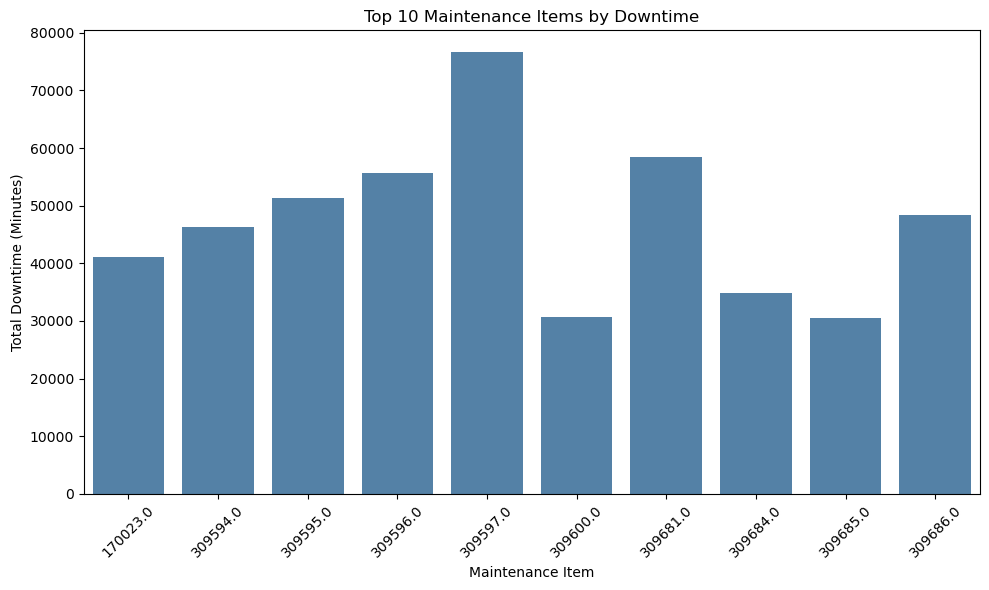

In [51]:
# Investigate Downtime by Maintenance Item using steelblue color palette
downtime_by_maintenance_item = df.groupby('MAINTENANCE_ITEM')['ACTUAL_WORK_IN_MINUTES'].sum().reset_index()
downtime_by_maintenance_item_sorted = downtime_by_maintenance_item.sort_values('ACTUAL_WORK_IN_MINUTES', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='MAINTENANCE_ITEM', y='ACTUAL_WORK_IN_MINUTES', data=downtime_by_maintenance_item_sorted.head(10), color='steelblue')
plt.title('Top 10 Maintenance Items by Downtime')
plt.xlabel('Maintenance Item')
plt.ylabel('Total Downtime (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
# summary table for the top 10 maintenance items by downtime
top_10_maintenance_items_summary = downtime_by_maintenance_item_sorted.head(10)

# Display the summary table
top_10_maintenance_items_summary


,MAINTENANCE_ITEM,ACTUAL_WORK_IN_MINUTES
3869,309597.0,76595.4
3872,309681.0,58503.6
3868,309596.0,55605.0
3867,309595.0,51353.4
3877,309686.0,48357.0
3866,309594.0,46351.8
3125,170023.0,41010.6
3875,309684.0,34845.6
3871,309600.0,30604.2
3876,309685.0,30462.0


*The bar chart shows the Top 10 Maintenance Items by downtime, with Item 309597.0 having the highest total downtime of approximately 80,000 minutes. Other items, such as 309595.0 and 309596.0, also contribute significant downtime, ranging from 50,000 to 70,000 minutes. This highlights that certain maintenance items cause much more downtime than others, suggesting these items may require further optimization or attention to reduce overall downtime.*

## Interpretive-Analysis <a id="Interpretive-Analysis"></a>

### Insights and Suggested Focus Areas:

- High Downtime at Silverstone (G261)
Insight: Silverstone exhibits the highest downtime and a notable disparity between planned and unplanned maintenance. With over 60 million minutes of downtime, it significantly affects overall operational efficiency.
Focus Area: Prioritize further analysis on Silverstone’s equipment and maintenance processes to understand specific challenges at this plant. This could guide subsequent predictive maintenance efforts.

- Machine Equipment Category with High Failure Rates
Insight: Failures in the machine equipment category at Silverstone occur approximately 90% of the time, indicating a high propensity for breakdowns in this category.
Focus Area: Investigate the machine equipment category at Silverstone in more depth to explore the potential for tailored predictive maintenance models that address this specific subset of data.

- Higher Unplanned Maintenance in Younger Machines
Insight: Contrary to expectations, younger machines (0.3 to 6 years old) have more unplanned maintenance events than older machines. This might suggest a lack of established maintenance protocols for newer equipment.
Focus Area: Examine maintenance protocols for newer machines and consider ways to enhance preventive maintenance during the initial years of equipment operation.

- Equipment ID 300017751.0 with Exceptionally High Downtime
Insight: Equipment ID 300017751.0 has an exceptionally high downtime of over 100 million minutes, which greatly surpasses other equipment.
Focus Area: Conduct a detailed review of Equipment ID 300017751.0 to identify underlying issues. This could include inspecting the equipment’s operational history, repair frequency, and overall condition.

- Impact of Unplanned Maintenance on Downtime
Insight: Unplanned maintenance accounts for over 120 million minutes of downtime, compared to around 10 million minutes for planned maintenance.
Focus Area: Further evaluate the causes of unplanned maintenance across plants and equipment types, and assess how preventive measures could help reduce these figures.

- Monthly and Seasonal Downtime Trends
Insight: Downtime peaks in March, May, and August, with consistent levels across seasons, suggesting operational or seasonal factors influencing maintenance schedules.
Focus Area: Investigate seasonal and monthly patterns in downtime to refine scheduling and resource allocation, especially during peak months.

- High-Downtime Functional Locations and Maintenance Items
Insight: Location G812-PRD and Maintenance Item 309597.0 have the highest downtimes in their respective categories, highlighting potential hotspots.
Focus Area: Focus further analysis on these high-downtime locations and maintenance items to understand why they require more maintenance and how improvements can be made.

By concentrating on these areas, we can refine our understanding and guide the next steps in the analysis, laying the groundwork for developing effective predictive maintenance strategies.


## Results and summary <a id="Results-and-Summary"></a>

### Results <a id="Results"></a>

### Question 1 Results 

When reviewing the visualization from question one, one data point stands out. As we determined in question three, Silverstone has the largest percentage difference between planned and unplanned maintenance, making it a key area to focus on. In this visualization, we see that failures in the machine equipment category at Silverstone occur about 90% of the time. This could be an excellent area to concentrate on, as this category is specific enough for a model to be tailored to this particular subset of data.

### Question 2 results 

When examining unplanned maintenance by machine age, an interesting trend emerges. It appears that the youngest machines, from 0.3 to 6 years old, experience the most unplanned maintenance events, while older machines, ranging from 6 to 13 years, tend to have fewer.

Several factors could explain this, such as the majority of machines being newer or perhaps that new machines haven’t yet established the necessary planned maintenance protocols, whereas older machines already follow regular maintenance schedules.

Nevertheless, it seems that focusing on younger machines may not be useful for developing a predictive maintenance model.

### Question 3 results 

The results of this analysis are fairly straightforward: Plant G261 (Silver Stone) has, by far, the highest number of unplanned maintenance activities and the largest percentage disparity between planned and unplanned maintenance. This suggests that, when developing our models in the next step, we should focus specifically on the issues occurring at Silver Stone.

By tailoring the model to one plant, it would need to be less flexible, potentially making it more accurate for predicting future unplanned maintenance events.

### Question 4 results

In this question we tried to find out the distribution of downtime (in minutes) across plants. Which showed that the Plant G261 has the highest downtime by a significant margin, with over 60 million minutes of downtime, making it a critical area for investigation. Plants G221 and G291 also have notable downtimes, though much lower than G261. In contrast, Plants G811, G812, and G816 show relatively minimal downtime, suggesting better efficiency. Focusing on reducing downtime in G261 and applying best practices from the more efficient plants could greatly improve overall operations

### Question 5 results

In this question we tried to figure out which equipment has the most frequent breakdowns the analysis showed that the Equipment ID 300017751.0 exhibits an exceptionally high downtime of over 100 million minutes, vastly surpassing the others. The next highest, Equipment ID 300009199.0, has around 484,506 minutes of downtime, underscoring a major gap between the two. The remaining equipment, such as 300017247.0 with 404,193 minutes and 300017654.0 with 390,294 minutes, show relatively similar downtimes, ranging between 276,619 and 404,193 minutes. This significant disparity indicates that Equipment ID 300017751.0 may need urgent maintenance focus, as it disproportionately contributes to the overall downtime.

### Question 6 results

While trying to understand whether the type of maintenance (planned/unplanned) affect downtime our analysis showed that the unplanned maintenance leads to significantly more downtime compared to planned maintenance. Unplanned maintenance contributes over 120 million minutes, while planned maintenance results in far less downtime, approximately 10 million minutes. This suggests that implementing more preventive (planned) maintenance could drastically reduce overall downtime. The disparity highlights the critical impact of unplanned maintenance on operational efficiency

### Question 7 results

Monthly Downtime Trends shows fluctuations in downtime across the months, with peaks in March, May, and a significant peak in August. Downtime drops sharply in September, followed by smaller upticks in October and November.
Seasonal Downtime Trends indicates relatively consistent downtime across the seasons, with Winter and Fall showing slightly lower downtime compared to Spring and Summer.
Overall, there are noticeable variations in downtime by month, but the seasonal downtime remains fairly balanced, with slightly higher downtime during the warmer seasons (Spring and Summer).

### Question 8 results

When we tried to analyze which functional locations experience the highest downtime, Location G812-PRD shows that it has the highest total downtime, exceeding 700,000 minutes. Several other locations, such as G816-PRD-L15-103-1080 and G812-PRD-A25, also have significant downtimes, but none come close to G812-PRD. The distribution indicates that specific locations have much higher downtime, which may warrant further investigation into their maintenance processes or equipment issues.

### Question 9 results

When understanding which maintenance items are associated with the highest downtime, Item 309597.0 has the highest total downtime of approximately 80,000 minutes. Other items, such as 309595.0 and 309596.0, also contribute significant downtime, ranging from 50,000 to 70,000 minutes. This highlights that certain maintenance items cause much more downtime than others, suggesting these items may require further optimization or attention to reduce overall downtime.

### Summary <a id="Summary"></a>

In [59]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1427264 │ │ string      │ 21    │                                                         │
│ │ Number of columns │ 25      │ │ float64     │ 3     │                                                         │
│ └───────────────────┴─────────┘ │ int32       │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_ ┃         ┃       ┃         ┃         ┃         ┃         ┃          ┃         ┃          ┃        ┃  │
│ ┃ name    ┃ NA      ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ORDER_I │       0 │     0 │ 5747000 │ 1063000 │ -194300 │ 2010000 │ 60060000 │ 7048000 │ 12160000 │ ▅   ▆▇ │  │
│ │ D       │         │       │       0 │     000 │    0000 │      00 │        0 │      00 │       00 │        │  │
│ │ ACTUAL_ │       0 │     0 │   88.63 │   803.8 │       0 │      12 │       48 │      90 │   330200 │   ▇    │  │
│ │ WORK_IN │         │       │         │         │         │         │          │         │          │        │  │
│ │ _MINUTE │         │       │         │         │         │         │          │         │          │        │  │
│ │ S       │         │       │         │         │         │         │          │         │          │        │  │
│ │ MAINTEN │ 1274670 │ 89.31 │  115800 │   71330 │   39800 │   41050 │   113000 │  134700 │   346400 │ ▇▇▁▁▁  │  │
│ │ ANCE_IT │         │       │         │         │         │         │          │         │          │        │  │
│ │ EM      │         │       │         │         │         │         │          │         │          │        │  │
│ │ EQUIPME │ 1135469 │ 79.56 │ 3003000 │ 5582000 │ 2001000 │ 3000000 │ 30000000 │ 3000000 │ 40000000 │    ▇▁  │  │
│ │ NT_ID   │         │       │      00 │         │      00 │      00 │        0 │      00 │        0 │        │  │
│ └─────────┴─────────┴───────┴─────────┴─────────┴─────────┴─────────┴──────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA            ┃ NA %      ┃ words per row          ┃ total words       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ PLANT_ID                          │             0 │         0 │                      1 │           1427264 │  │
│ │ PRODUCTION_LOCATION               │             0 │         0 │                      1 │           1427264 │  │
│ │ EXECUTION_START_DATE              │             0 │         0 │                      1 │           1427264 │  │
│ │ EXECUTION_FINISH_DATE             │             0 │         0 │                      1 │           1427264 │  │
│ │ ACTUAL_START_TIME                 │             0 │ 

**Key findings:**

- **Downtime Distribution:** The analysis shows significant variations in downtime across different plants, with some plants experiencing considerably higher downtime, indicating potential inefficiencies or bottlenecks in specific locations.

- **Equipment with Frequent Breakdowns:** A few pieces of equipment consistently account for the majority of downtime, suggesting these might require further investigation for maintenance or replacement.

- **Planned vs. Unplanned Maintenance:** Unplanned maintenance tends to result in higher downtime compared to planned maintenance, reinforcing the importance of scheduling regular maintenance to minimize disruptions.

- **Monthly and Seasonal Trends:** The downtime appears to follow specific seasonal patterns, with certain months experiencing spikes, potentially due to weather conditions or production cycles.

These findings suggest areas where operational efficiency can be improved by focusing on high-downtime equipment and optimizing maintenance schedules.


### Conclusion <a id="Conclusion"></a> 

In this EDA, we identified several key insights regarding maintenance activities and downtime across plants and equipment. Plant G261 (Silverstone) emerged as a significant area of concern, with the highest levels of unplanned maintenance and a substantial imbalance between planned and unplanned maintenance. Specifically, Silverstone's machine equipment category demonstrates a high failure rate of around 90%, indicating a potential target for predictive maintenance modeling.

Additionally, the analysis revealed that younger machines, aged between 0.3 to 6 years, are more susceptible to unplanned maintenance, contradicting assumptions that older machines are the primary sources of failures. Equipment ID 300017751.0 showed exceptionally high downtime compared to other equipment, further highlighting it as a critical asset requiring attention.

On a seasonal basis, downtime trends are relatively balanced, but monthly fluctuations show notable peaks in March, May, and August. This variability suggests a possible influence of operational schedules or seasonal factors, which could inform future maintenance planning. Moreover, specific functional locations and maintenance items were identified as having disproportionately high downtime, suggesting that targeted improvements in these areas could yield significant reductions in overall downtime.

Overall, these findings emphasize the importance of focusing on Silverstone, particularly its machine equipment category, and optimizing maintenance for younger machines and high-downtime equipment. By addressing these areas, we can improve predictive maintenance strategies, reduce unplanned maintenance, and enhance operational efficiency across the organization.

## Group member contribution   <a id="Group-member-contribution"></a> 

Our group collaborated to conduct a comprehensive EDA on downtime data for Swire Coca-Cola’s production plants. Hunter Harmer analyzed maintenance types by plant ID, discussed missing data, and proposed exploring trends in unplanned maintenance across various plants. McKay Flake examined the relationship between equipment ID and maintenance activity type, performed feature engineering, visualizations, and summarized the notebook. Raunak Sharma examined downtime patterns, addressed missing data, performed data preprocessing, added tables, and compiled the notebook with additional visualizations and summaries, ensuring a thorough final analysis. Together, we combined individual insights to better understand the factors affecting downtime and maintenance efficiency across the production plants.